In [ ]:
#MULTIPLE LINEAR REGRESSION is a statistical technique used to model the relationship between a dependent variable and two or more independent variables

**Assignment Task:**

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.




**Dataset Description:**

The dataset consists of the following variables:

Age: Age in years

KM: Accumulated Kilometers on odometer

FuelType: Fuel Type (Petrol, Diesel, CNG)

HP: Horse Power


Automatic: Automatic ( (Yes=1, No=0)

CC: Cylinder Volume in cubic centimeters

Doors: Number of doors

Weight: Weight in Kilograms

Quarterly_Tax:

Price: Offer Price in EUROs


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
# laoding the dataset
data = pd.read_csv('/content/ToyotaCorolla - MLR.csv');

In [9]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [11]:
data.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


**Taskes:**

1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.


In [12]:
# summary stastics-exploratory data analysis (EDA)
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


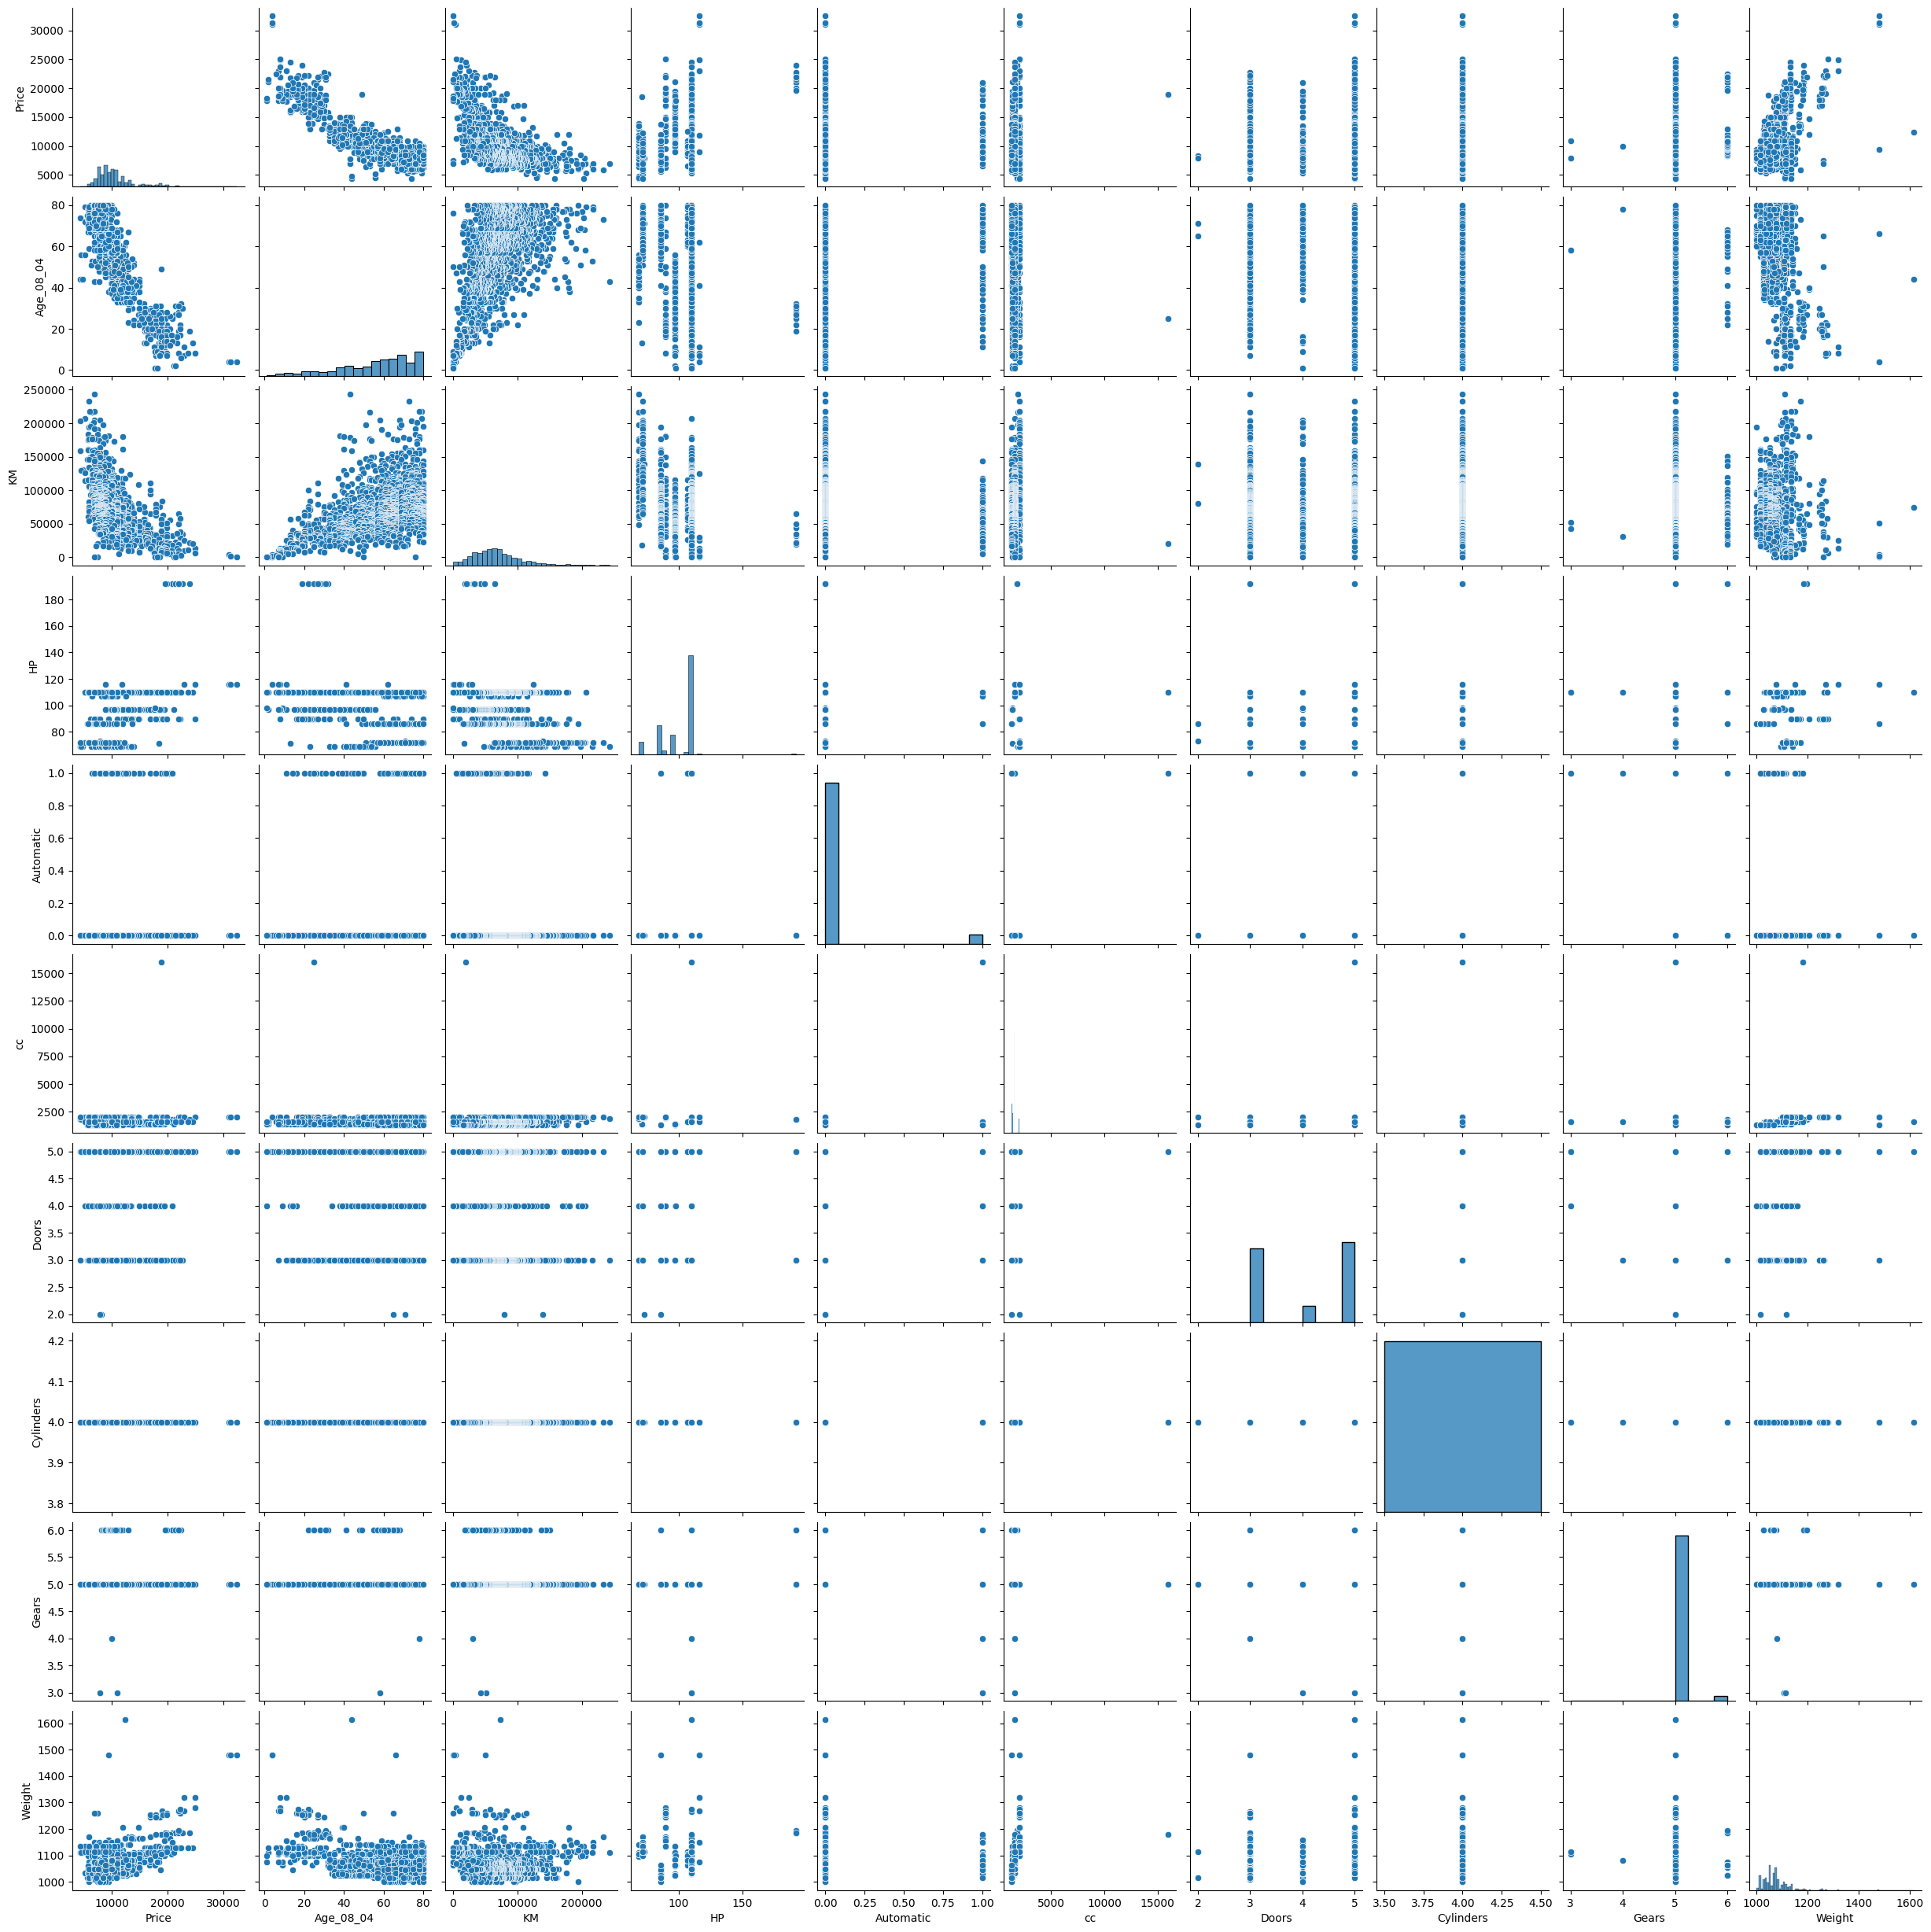

In [13]:
# Visualization
sns.pairplot(data)
plt.show()

In [51]:
#Preprocessing and converting variable to dummy or categorical values
data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)

In [50]:
print(data.columns)


Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')


In [27]:
print(data.columns)

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')


In [25]:
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


**TASK 2**.

Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [40]:
x = data.drop('Price', axis=1)
y = data['Price']
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.2, random_state=42)

**TASK 3**


.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [30]:
models = []

In [39]:
#Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)
models.append(('Ridge', model_ridge))

In [33]:
# Lasoo Regression
model_lasso  = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)
models.append(('Lasso', model_lasso))

In [32]:
### Ordinary Square Regression (OLS)
model_ols  = LinearRegression()
model_ols.fit(x_train, y_train)
models.append(('OLS', model_ols))

**TASK 4**.

Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [35]:
## Defining a function naming model to evaluate the performance
for name, model in models:
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}, R^2 Score: {r2}")

Ridge - Mean Squared Error: 2199746.3702333393, R^2 Score: 0.8351359377712336
OLS - Mean Squared Error: 2203043.8231437025, R^2 Score: 0.8348888040611082
Lasso - Mean Squared Error: 2195387.2460865397, R^2 Score: 0.8354626403967389
Ridge - Mean Squared Error: 2199746.3702333393, R^2 Score: 0.8351359377712336


**TASK 5**.

Apply Lasso and Ridge methods on the model.

In [46]:
#Ridge Regression
alpha_ridge = 1.0
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(x_train, y_train)
ridge_coefficient = ridge_model.coef_

print("Ridge Regression Coefficients:")
for feature, coef in zip(x.columns, ridge_coefficient):
    print(f"{feature}: {coef}")

Ridge Regression Coefficients:
Age_08_04: -120.77965945868493
KM: -0.016324079542572006
HP: 14.141834012008527
Automatic: 146.90746971608866
cc: -0.030509438556819056
Doors: -59.90579131646375
Cylinders: 0.0
Gears: 542.2723281414661
Weight: 25.82101944161877
Fuel_Type_Diesel: -128.81307202315259
Fuel_Type_Petrol: 1294.9498258986353


In [47]:
#Lasoo Regresssion
alpha_lasso = 1.0
lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(x_train, y_train)
lasso_coefficient = lasso_model.coef_

print("Lasoo Regresion Coefficients:")
for feature, coef in zip(x.columns, lasso_coefficient):
    print(f"{feature}: {coef}")

Lasoo Regresion Coefficients:
Age_08_04: -120.7980320188164
KM: -0.01632553410027898
HP: 14.55921996229932
Automatic: 133.4014541660453
cc: -0.03239882461911515
Doors: -58.67316094777726
Cylinders: 0.0
Gears: 522.1774765640034
Weight: 25.721963099346983
Fuel_Type_Diesel: -32.31012559539381
Fuel_Type_Petrol: 1364.391707347425
